<a href="https://colab.research.google.com/github/Melikakmm/CLPBgroup17/blob/main/Question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**initial** **weight**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf

# number of data
N=4000
# size of each sample
L=2
# box size
B=100

!mkdir DATA

2 5 1


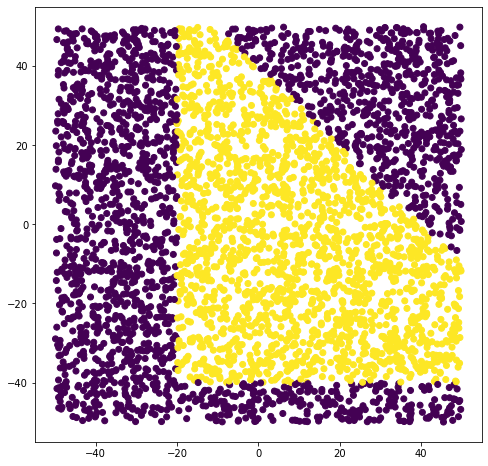

In [ ]:
import numpy as np

# a nonlinear function of a 2d array x
def f(x,c=1):
    r=0
    if c==1:
        if x[0]>-20 and x[1]>-40 and x[0]+x[1] < 40:
            r=1
    if c==2:
        if (np.sign(x.sum())*np.sign(x[0]))*np.cos(np.linalg.norm(x)/(2*np.pi))>0:
            r=1
    return r


def filename(s,TYPE=1):
    return "./DATA/"+s+"-for-DNN-"+str(TYPE)+".dat"

TYPE=1

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout

import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 14

perc_train = 0.8
batch_size = 50

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 4000
train: 3200


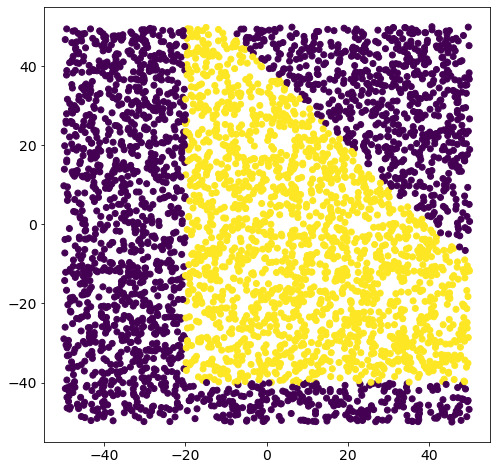

In [ ]:
import numpy as np
import os
TYPE = 1
x = np.loadtxt(filename("data",TYPE), delimiter=" ")
y = np.loadtxt(filename("labels",TYPE), delimiter=" ")

# dim of sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i], y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [ ]:
(x_train, y_train) = (x[0:N_train], y[0:N_train])
(x_valid, y_valid) = (x[N_train:], y[N_train:])
print("Train:", len(x_train), "\t Validation:", len(x_valid))





Train: 3200 	 Validation: 800


In [ ]:
def Rescale(x):
    # return (x - x.mean())/np.sqrt(x.var())
    return x/(B/2)
x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [ ]:
np.random.seed(12345)
#def create_model(case = 1, optimizer = "adam", dropout_rate = 0.2, n_layers = 2,
#                 activation = 'relu', neurons = 20):

#regular set with random initial weights random_normal
#different choice glorot_uniform
#random_uniform
#zeros
# initial = tf.keras.initializers.RandoNormal(mean=0. , stdev=1. , seed =12345)
def create_DNN(case = 1):
  if case == 1:
      model = Sequential()
      model.add(Dense(L, input_shape=(L,), activation='relu', kernel_initializer='glorot_uniform'))
      model.add(Dense(20, activation='relu', kernel_initializer='glorot_uniform'))
      model.add(Dense(20, activation='relu', kernel_initializer='glorot_uniform'))
      model.add(Dropout(0.2))
      model.add(Dense(1, activation='sigmoid'))
      nepoch = 400
  if case == 2:
      model = Sequential()
      model.add(Dense(L, input_shape=(L,), activation='sigmoid'))
      model.add(Dense(3, activation='sigmoid'))
      model.add(Dense(1, activation='sigmoid'))
      nepoch = 400



  return model

#model  = create_model(case = 1, optimizer = "adam",dropout_rate = 0.2,n_layers = 2,
#                      activation = 'relu', neurons = 20)

#model.summary()



In [ ]:
loss = 'binary_crossentropy' 
optimizer = 'adam'           
metrics = ['accuracy']
def compile_model(case = 1, optimizer = "adam",dropout_rate = 0.2,n_layers = 2,
                      activation = 'relu', neurons = 20):
    # create the model
    model=create_DNN(case=case)
    # compile the model
    model.compile(loss=keras.losses.binary_crossentropy,
                 optimizer=optimizer,
                metrics=['accuracy'])
    
    model.save_weights('initial_weights.txt')

    return model

model = compile_model()

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 20)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________


In [ ]:
initial_weights = model.get_weights()
model.save_weights('initial_weights.txt')

print(initial_weights)

fit = model.fit(x_train, y_train, epochs=400, batch_size=50, validation_data=(x_valid, y_valid),
               verbose=2)

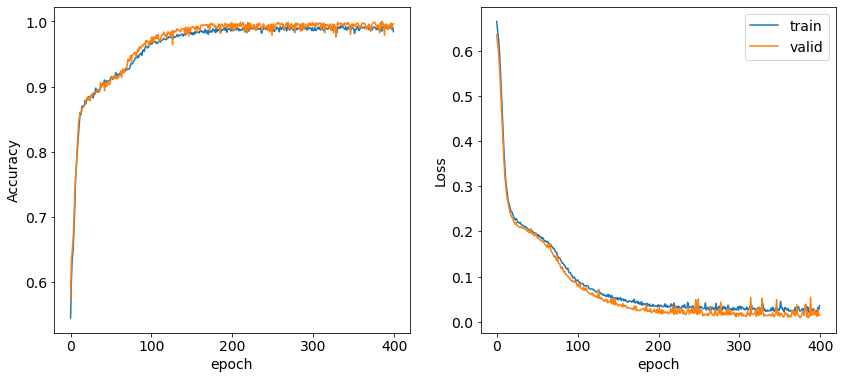

In [ ]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid")
ax.set_xlabel('epoch')
ax.set_ylabel('Accuracy')
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid")
ax.set_xlabel('epoch')
ax.set_ylabel('Loss')
ax.legend()

## **Rescaling**

Here we use two other *Rescaling* function to see what is going to happen.

In [ ]:
#ans4

#Standardization(first method)
def Rescale(x):
    # return (x - x.mean())/np.sqrt(x.var())
    return x/(B/2)
x_train1 = Rescale(x_train)

x_valid1 = Rescale(x_valid)


#min_max rescaling(secodn method)
def Rescale2(x):
  return (x - np.max(x))/( np.max(x) - np.min(x))
x_train2 = Rescale2(x_train)

x_valid2 = Rescale2(x_valid)



# x/ max(in a column)(third method)
def Rescale3(x):
  X= x.copy()
  for i in [0,1]:
    for j in range(len(X)):
      if i == 0:
        X[j, i] = X[j, i] / np.max(X[:, i])
      else :
        X[j, i] = X[j, i] / np. max(X[:, i])
  return X

x_train3 = Rescale3(x_train)

x_valid3 = Rescale3(x_valid)




fig, ax = plt.subplots(1, 3, figsize = (300, 150))
ax[0].hist(x_train1, bins = 500)
ax[0].set_title('first Rescaling method')
ax[1].hist(x_train2, bins = 500)
ax[1].set_title('second Rescalig method')
ax[2].hist(x_train3, bins = 500)
ax[2].set_title('third Rescaling method')
plt.show()


print('volatility of first : ', np.std(x_train1))
print('volatility of second : ', np.std(x_train2))
print('volatility of third : ', np.std(x_train3))

print('\n', 'the best choice of rescaling for this amount of data is the first')

volatility of first :  0.011534835966057687
volatility of second :  0.28840964544991493
volatility of third :  0.5767726897107772

 the best choice of rescaling for this amount of data is the first


In [ ]:
#model
model = Sequential()
model.add(Dense(L,input_shape=(L,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
nepoch=400

In [ ]:
model.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
fit1 = model.fit(x_train1, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid1,y_valid),
               verbose=2)


In [ ]:
fit2 = model.fit(x_train2, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid2,y_valid),
               verbose=2)

In [ ]:
fit3 = model.fit(x_train3, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid3,y_valid),
               verbose=2)

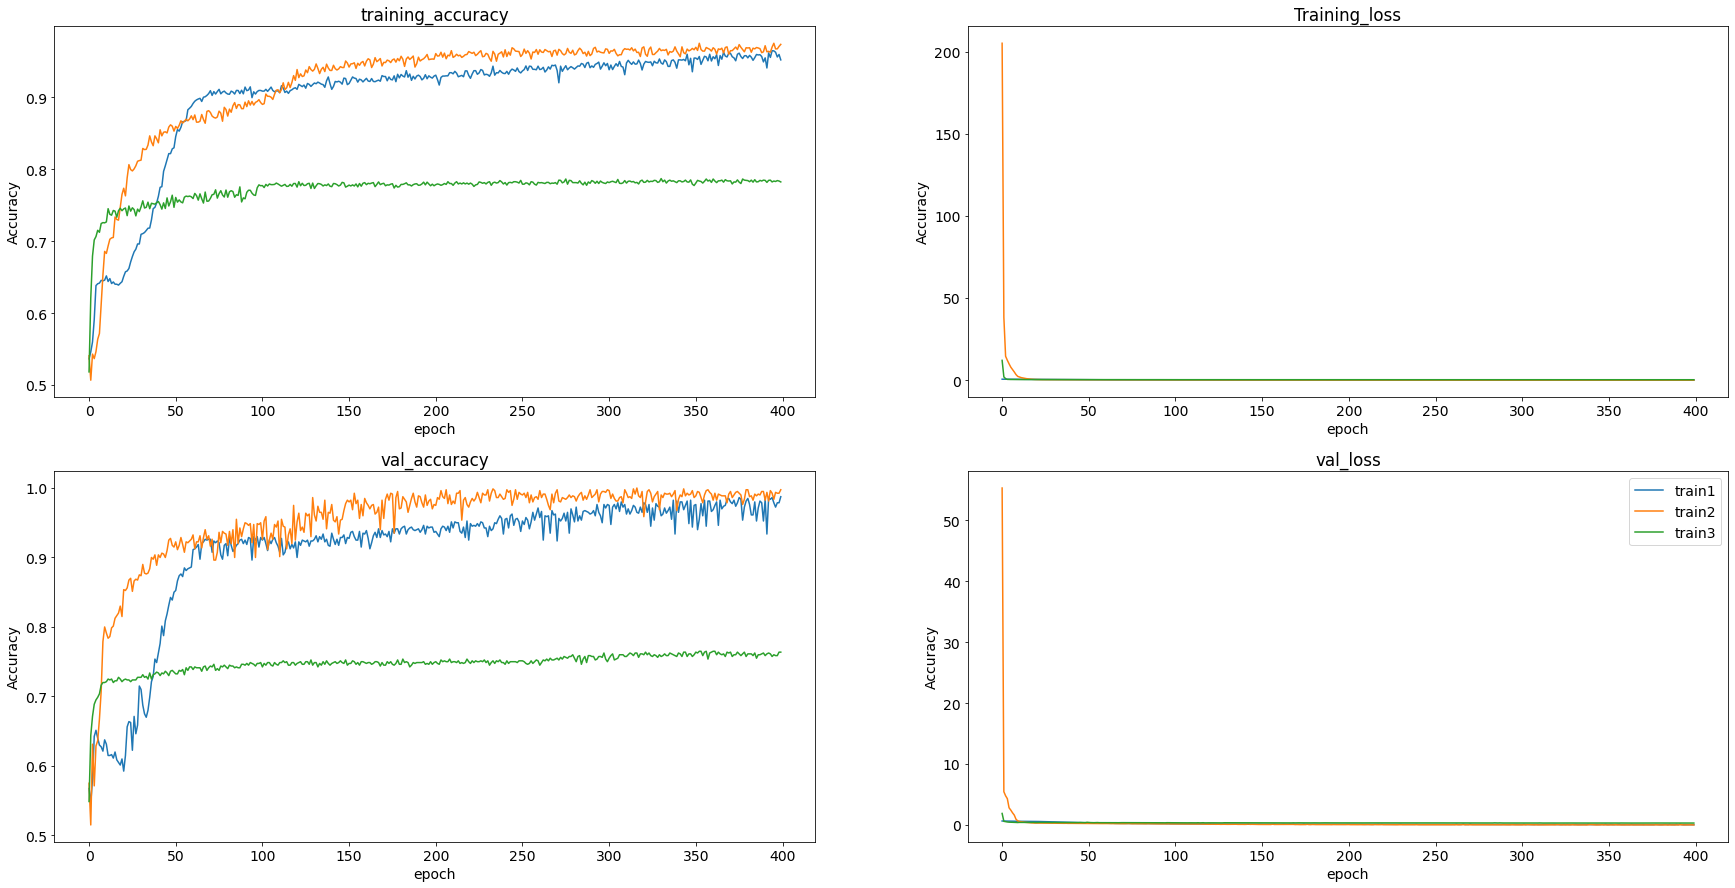

In [ ]:
fig,AX=plt.subplots(2, 2,figsize=(30,15))
ax=AX[0, 0]
ax.plot(fit1.history['accuracy'], label="train1")
ax.plot(fit2.history['accuracy'], label = 'train2')
ax.plot(fit3.history['accuracy'], label = 'train3')
ax.set_title('training_accuracy')
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")


ax = AX[0, 1]
ax.plot(fit1.history['loss'], label = "train1")
ax.plot(fit2.history['loss'], label = 'train2')
ax.plot(fit3.history['loss'], label = 'train3')
ax.set_title('Training_loss')
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")

ax=AX[1, 0]
ax.plot(fit1.history['val_accuracy'], label = 'valid1')
ax.plot(fit2.history['val_accuracy'], label ="valid2")
ax.plot(fit3.history['val_accuracy'], label = 'valid3')
ax.set_title('val_accuracy')
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")

ax = AX[1, 1]
ax.plot(fit1.history['val_loss'], label = "train1")
ax.plot(fit2.history['val_loss'], label = 'train2')
ax.plot(fit3.history['val_loss'], label = 'train3')
ax.set_title('val_loss')
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")



ax.legend()